# IMPORT NECESSARY MODULES


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
sns.set()
import warnings
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
warnings.filterwarnings('ignore')
%matplotlib inline
from termcolor import colored

# DESCRIPTIVE ANALYSIS

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
print("(rows,columns)=",df.shape)
df.describe()

(rows,columns)= (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [8]:
features = list(df.drop('Outcome',axis=1).columns)
target = ['Outcome']
print(f"The columns are : {colored(features, 'blue')}")
print(f"The target is   : {colored(target,'red')}")

The columns are : ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
The target is   : ['Outcome']


In [9]:
print("Number of samples for Outcome variable 0 are : ",len(df[df['Outcome']==0]))
print("Number of samples for Outcome variable 1 are : ",len(df[df['Outcome']==1]))


Number of samples for Outcome variable 0 are :  500
Number of samples for Outcome variable 1 are :  268


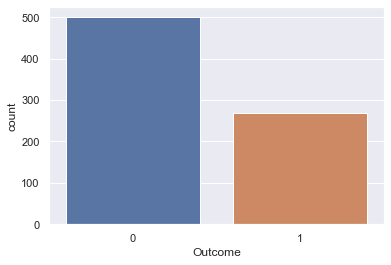

In [10]:
sns.countplot(x = 'Outcome',data = df)

# DATA CLEANSING AND PREPROCESSING

In [11]:
dfcopy1 = df.copy(deep = True)
dfcopy1[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = dfcopy1[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
dfcopy1.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

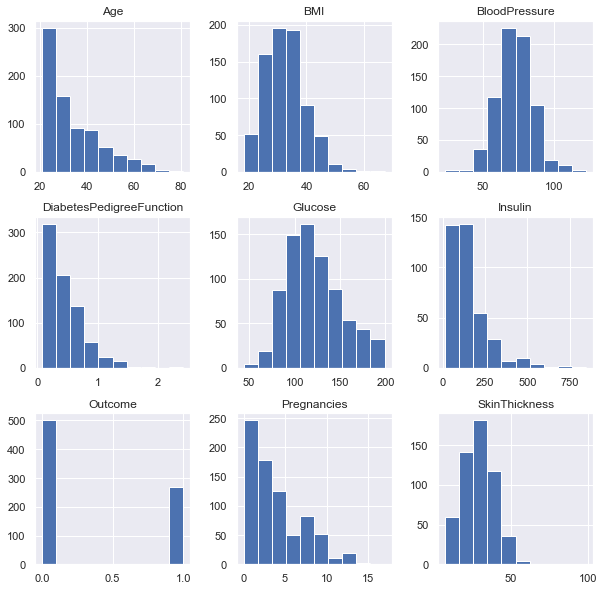

In [12]:
histplot= dfcopy1.hist(figsize = (10,10))

**Visualization after null values are removed**


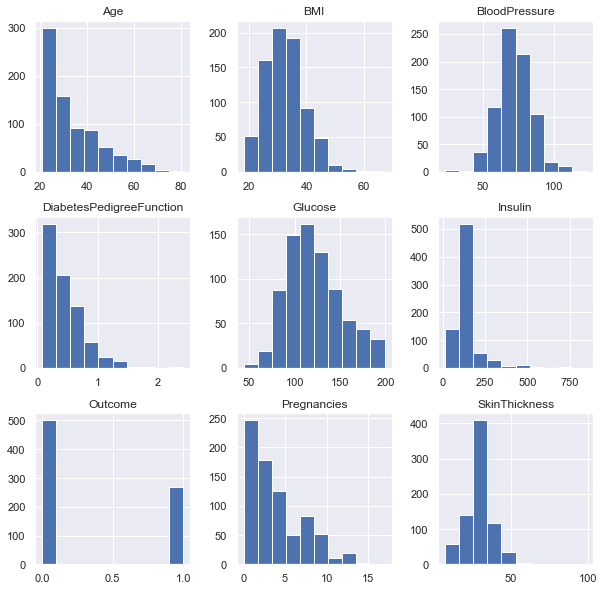

In [13]:
dfcopy1['Glucose'].fillna(dfcopy1['Glucose'].mean(), inplace = True)
dfcopy1['BloodPressure'].fillna(dfcopy1['BloodPressure'].mean(), inplace = True)
dfcopy1['SkinThickness'].fillna(dfcopy1['SkinThickness'].median(), inplace = True)
dfcopy1['Insulin'].fillna(dfcopy1['Insulin'].median(), inplace = True)
dfcopy1['BMI'].fillna(dfcopy1['BMI'].median(), inplace = True)
print("**Visualization after null values are removed**")
p = dfcopy1.hist(figsize = (10,10))

# FEW VISUALIZATION ON DATA

## Age distribution

<function matplotlib.pyplot.show(*args, **kw)>

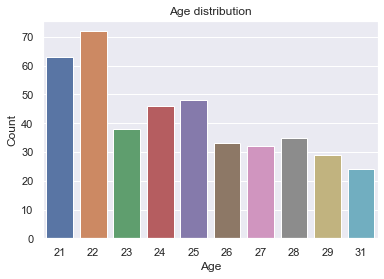

In [14]:
sns.barplot(x= df.Age.value_counts()[:10].index, y= df.Age.value_counts()[:10].values  )
plt.xlabel('Age')
plt.ylabel("Count")
plt.title("Age distribution")
plt.show

# Glucose Distribution

<function matplotlib.pyplot.show(*args, **kw)>

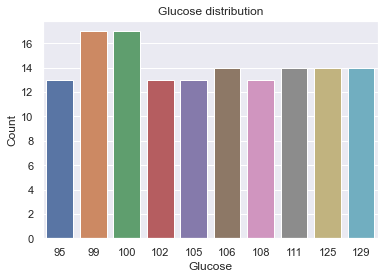

In [15]:
sns.barplot(x= df.Glucose.value_counts()[:10].index, y= df.Glucose.value_counts()[:10].values  )
plt.xlabel('Glucose')
plt.ylabel("Count")
plt.title("Glucose distribution")
plt.show

In [16]:
young_ages = df[(df.Age>=20)&(df.Age<35)]
middle_ages =  df[(df.Age>=35)&(df.Age<55)]
elderly_ages =  df[(df.Age>=55)]
print("Young Ages", len(young_ages))
print("Middle Ages", len(middle_ages))
print("Elderly Ages", len(elderly_ages))


Young Ages 488
Middle Ages 226
Elderly Ages 54


Percentage wise distribution of age in the dataset


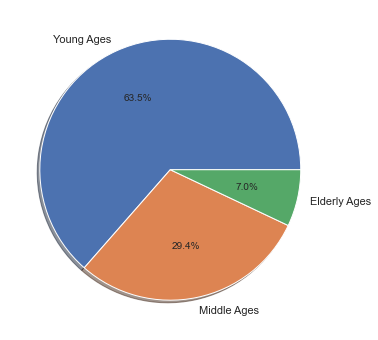

In [17]:
colors = ['blue','green','red']
explode= [0,0,0.1]
plt.figure(figsize=(6,6))
plt.pie([len(young_ages),len(middle_ages),len(elderly_ages)],shadow = True,labels=['Young Ages','Middle Ages','Elderly Ages'],autopct = '%1.1f%%')
print("Percentage wise distribution of age in the dataset")
plt.show()

PAIR PLOT FOR CLEANSED DATA


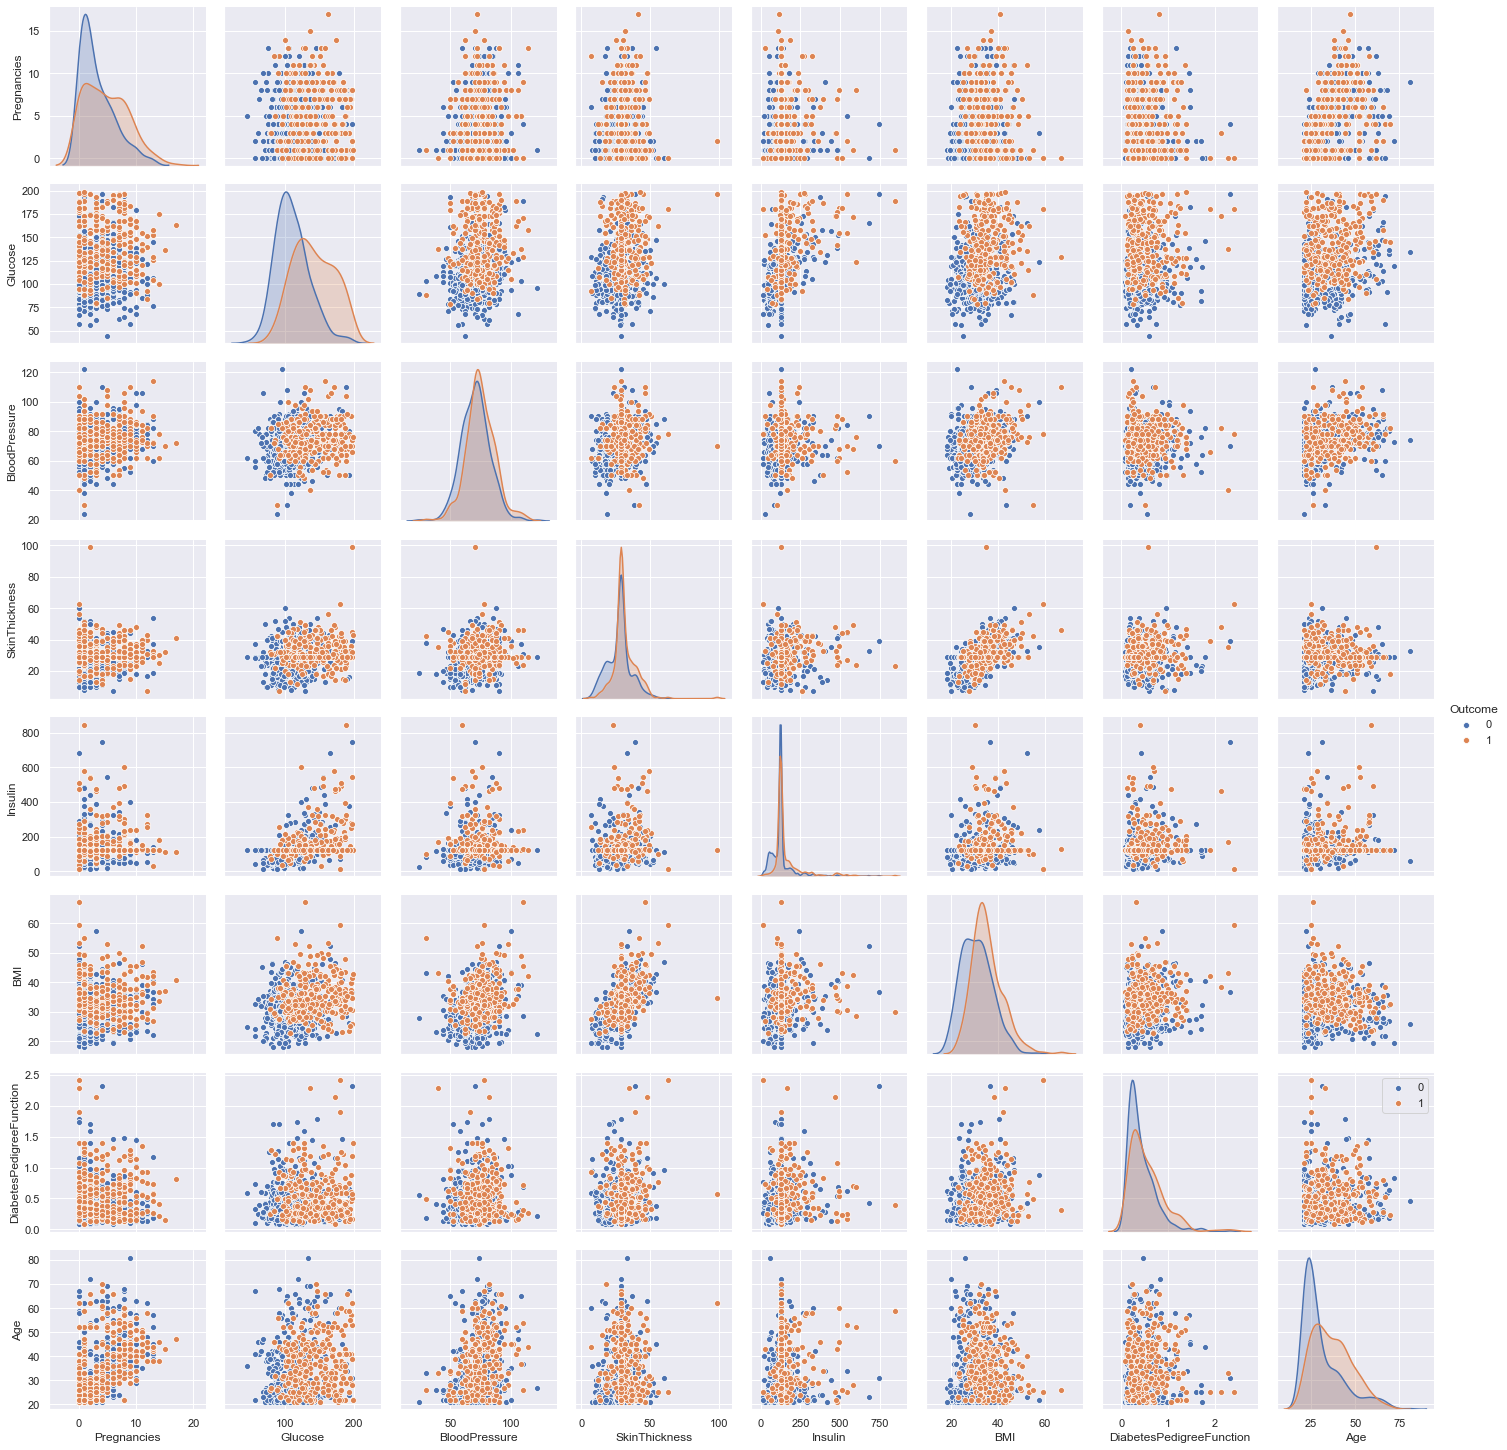

In [18]:
#PAIR PLOT FOR CLEANSED DATA
print("PAIR PLOT FOR CLEANSED DATA")
sns.pairplot(dfcopy1, hue = 'Outcome')
plt.legend()

HEAT MAP FOR CLEANSED DATA


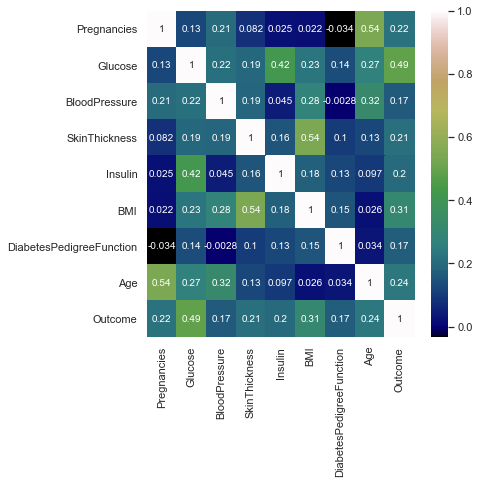

In [19]:
#HEAT MAP FOR CLEANSED DATA
plt.figure(figsize=(6,6)) 
print("HEAT MAP FOR CLEANSED DATA")
p=sns.heatmap(dfcopy1.corr(), annot=True,cmap ='gist_earth')


SCATTER PLOT OF OUTCOME WITH BLOOD PRESSURE


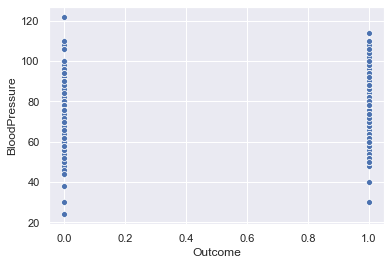

In [20]:
#SCATTER PLOT OF OUTCOME WITH BLOOD PRESSURE
sns.scatterplot(x='Outcome',y='BloodPressure',data=dfcopy1)
print("SCATTER PLOT OF OUTCOME WITH BLOOD PRESSURE")

BOX PLOT OF OUTCOME WITH GLUCOSE LEVELS


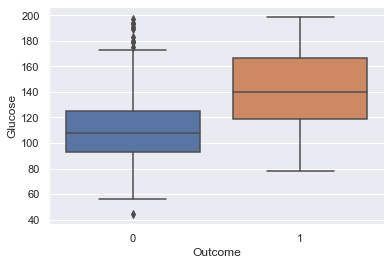

In [21]:
#BOX PLOT OF OUTCOME WITH GLUCOSE LEVELS
print("BOX PLOT OF OUTCOME WITH GLUCOSE LEVELS")
sns.boxplot(x='Outcome',y='Glucose',data=dfcopy1)

VIOLIN PLOT OF OUTCOME WITH INSULIN LEVELS


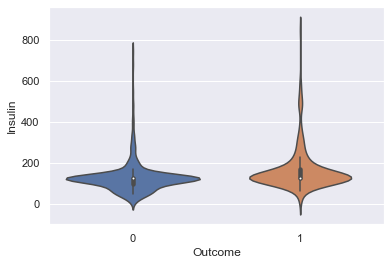

In [22]:
#VIOLIN PLOT OF OUTCOME WITH INSULIN LEVELS
print("VIOLIN PLOT OF OUTCOME WITH INSULIN LEVELS")
sns.violinplot(x="Outcome", y="Insulin",data=dfcopy1, kind="violin", split=True, height=4, aspect=.7)

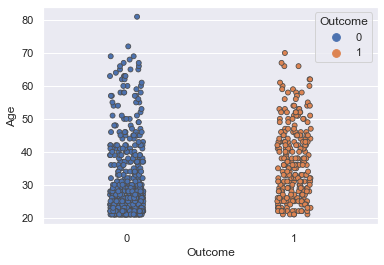

In [23]:
#STRIP PLOT OF OUTCOME WITH AGE
sns.stripplot(x='Outcome', y= 'Age', data=dfcopy1,hue='Outcome',linewidth=0.8)

# DATA SPLITTING

In [24]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [25]:
X = dfcopy1.drop(['Outcome'],axis =1)
Y = dfcopy1.Outcome.values
#from sklearn.preprocessing import StandardScaler 
#sc_X = StandardScaler()
#X =  pd.DataFrame(sc_X.fit_transform(dfcopy1.drop(["Outcome"],axis = 1),),
 #       columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
  #     'BMI', 'DiabetesPedigreeFunction', 'Age'])
#X.head()

In [26]:
Y = dfcopy1.Outcome
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((614, 8), (154, 8), (614,), (154,))

# MODEL BUILDING

## 1- Logistic Regression

In [28]:
from sklearn import metrics
model1 = LogisticRegression(penalty='l2')
# fit the model with train data
model1.fit(X_train,Y_train.ravel())
y_pred_1 = model1.predict(X_test)
accuracy_log=metrics.accuracy_score(Y_test, y_pred_1)
print("Train Set Accuracy:"+str(metrics.accuracy_score(Y_train,model1.predict(X_train))*100),"%")
print("Test Set Accuracy:"+str(metrics.accuracy_score(Y_test,model1.predict(X_test))*100),"%")
print ("Confusion Matrix : \n", metrics.confusion_matrix(Y_test,y_pred_1))
print()
print ("The accuracy of Logistic Regression is : ", metrics.accuracy_score(Y_test,y_pred_1 )*100, "%")
print()
print("Precision score for Logistic Regression is :",metrics.precision_score(Y_test,y_pred_1)*100, "%")
print()
print("Recall score for Logistic Regression is :",metrics.recall_score(Y_test,y_pred_1)*100, "%")
print('Test Accuracy {:.2f}%'.format(model1.score(X_test, Y_test)*100))

Train Set Accuracy:76.71009771986971 %
Test Set Accuracy:82.46753246753246 %
Confusion Matrix : 
 [[95 12]
 [15 32]]

The accuracy of Logistic Regression is :  82.46753246753246 %

Precision score for Logistic Regression is : 72.72727272727273 %

Recall score for Logistic Regression is : 68.08510638297872 %
Test Accuracy 82.47%


## 2- KNN Classifier

In [29]:
model2 = KNeighborsClassifier(n_neighbors=9)                #knn classifier
model2.fit(X_train,Y_train)
y_pred_2 = model2.predict(X_test)
accuracy_KNN=metrics.accuracy_score(Y_test, y_pred_2)
print("Train Set Accuracy:"+str(metrics.accuracy_score(Y_train,model2.predict(X_train))*100))
print("Test Set Accuracy:"+str(metrics.accuracy_score(Y_test,y_pred_2)*100))
print ("Confusion Matrix : \n", metrics.confusion_matrix(Y_test,y_pred_2))
print()
print ("The accuracy of KNN is : ", metrics.accuracy_score(Y_test, y_pred_2)*100, "%")
print()
print("Precision score for KNN is :",metrics.precision_score(Y_test, y_pred_2)*100, "%")
print()
print("Recall score for KNN is :",metrics.recall_score(Y_test, y_pred_2)*100, "%")



Train Set Accuracy:78.50162866449512
Test Set Accuracy:75.32467532467533
Confusion Matrix : 
 [[88 19]
 [19 28]]

The accuracy of KNN is :  75.32467532467533 %

Precision score for KNN is : 59.57446808510638 %

Recall score for KNN is : 59.57446808510638 %


## 3- Random Forest Classifier

In [30]:
model3 = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy',max_depth=100, random_state = 1)
model3.fit(X_train, Y_train)
y_pred_3 = model3.predict(X_test)
accuracy_RF=metrics.accuracy_score(Y_test, y_pred_3)
print("Train Set Accuracy:"+str(metrics.accuracy_score(Y_train,model3.predict(X_train))*100))
print("Test Set Accuracy:"+str(metrics.accuracy_score(Y_test,y_pred_3)*100))
print ("Confusion Matrix : \n", metrics.confusion_matrix(Y_test,y_pred_3))
print()
print ("The accuracy of RF is : ", metrics.accuracy_score(Y_test, y_pred_3)*100, "%")
print()
print("Precision score for RF is :",metrics.precision_score(Y_test, y_pred_3)*100, "%")
print()
print("Recall score for RF is :",metrics.recall_score(Y_test, y_pred_3)*100, "%")

Train Set Accuracy:100.0
Test Set Accuracy:81.81818181818183
Confusion Matrix : 
 [[94 13]
 [15 32]]

The accuracy of RF is :  81.81818181818183 %

Precision score for RF is : 71.11111111111111 %

Recall score for RF is : 68.08510638297872 %


## 4- Gradient Boosting Classifier

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
model4 = GradientBoostingClassifier()
model4.fit(X_train, Y_train)
y_pred_4=model4.predict(X_test)
accuracy_GB=metrics.accuracy_score(Y_test, y_pred_4)
print("Train Set Accuracy:"+str(metrics.accuracy_score(Y_train,model4.predict(X_train))*100))
print("Test Set Accuracy:"+str(metrics.accuracy_score(Y_test,y_pred_4)*100))
print ("Confusion Matrix : \n", metrics.confusion_matrix(Y_test,y_pred_4))
print()
print ("The accuracy of GB is : ", metrics.accuracy_score(Y_test, y_pred_4)*100, "%")
print()
print("Precision score for GB is :",metrics.precision_score(Y_test, y_pred_4)*100, "%")
print()
print("Recall score for GB is :",metrics.recall_score(Y_test, y_pred_4)*100, "%")


Train Set Accuracy:91.85667752442997
Test Set Accuracy:84.4155844155844
Confusion Matrix : 
 [[94 13]
 [11 36]]

The accuracy of GB is :  84.4155844155844 %

Precision score for GB is : 73.46938775510205 %

Recall score for GB is : 76.59574468085107 %


## 5- Decision Tree Classifier

In [32]:
model5 = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
model5.fit(X_train, Y_train)
y_pred_5=model5.predict(X_test)
accuracy_DT=metrics.accuracy_score(Y_test, y_pred_5)
print("Train Set Accuracy:"+str(metrics.accuracy_score(Y_train,model5.predict(X_train))*100))
print("Test Set Accuracy:"+str(metrics.accuracy_score(Y_test,y_pred_5)*100))
print ("Confusion Matrix : \n", metrics.confusion_matrix(Y_test,y_pred_5))
print()
print ("The accuracy of DT is : ", metrics.accuracy_score(Y_test, y_pred_5)*100, "%")
print()
print("Precision score for DT is :",metrics.precision_score(Y_test, y_pred_5)*100, "%")
print()
print("Recall score for DT is :",metrics.recall_score(Y_test, y_pred_5)*100, "%")


Train Set Accuracy:100.0
Test Set Accuracy:68.18181818181817
Confusion Matrix : 
 [[75 32]
 [17 30]]

The accuracy of DT is :  68.18181818181817 %

Precision score for DT is : 48.38709677419355 %

Recall score for DT is : 63.829787234042556 %


# MODEL COMPARISION

In [33]:
models = pd.DataFrame({
    'Model': ['Logistic Reg','KNN', 'Random Forest Classifier' ,
             'Gradient Boosting Classifier','Decision Tree Classifier'],
    'Score': [ accuracy_log,accuracy_KNN,accuracy_RF,accuracy_GB,accuracy_DT]
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,Gradient Boosting Classifier,0.844156
0,Logistic Reg,0.824675
2,Random Forest Classifier,0.818182
1,KNN,0.753247
4,Decision Tree Classifier,0.681818


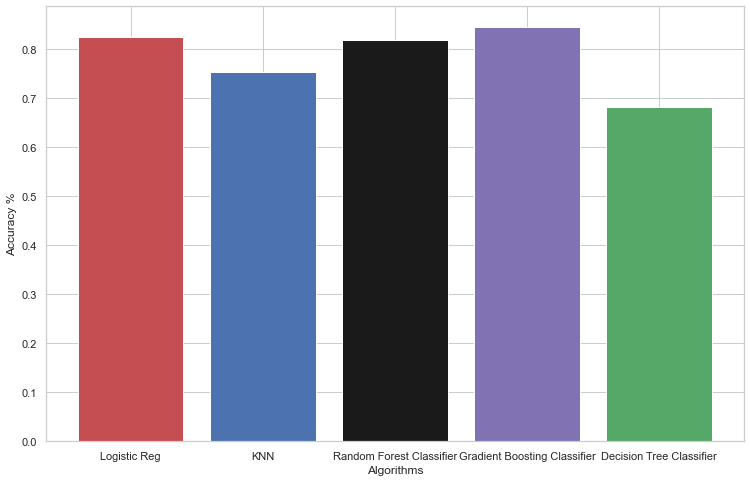

In [34]:
colors = ["purple", "green", "orange", "magenta","blue","black"]
sns.set_style("whitegrid")
plt.figure(figsize=(12.5,8))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
plt.bar(models['Model'],models['Score'],color = ["r", "b", "k", "m","g","c"])
plt.show()

# MODEL SELECTION WITH HIGH ACCURACY

### MODEL EVALUATION FOR LOGISTIC REGRESSION

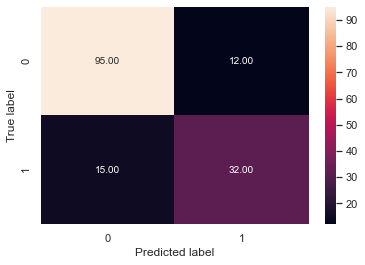

In [35]:
from sklearn import metrics
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted )
    sns.heatmap(cm, annot=True, fmt='.2f') 
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
draw_cm( Y_test,y_pred_1 )

In [36]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred_1))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88       107
           1       0.73      0.68      0.70        47

    accuracy                           0.82       154
   macro avg       0.80      0.78      0.79       154
weighted avg       0.82      0.82      0.82       154



### MODEL EVALUATION FOR GRADIENT BOOSTING CLASSIFIER

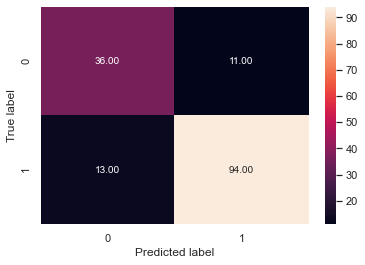

In [37]:
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sns.heatmap(cm, annot=True, fmt='.2f') 
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
draw_cm( Y_test,y_pred_4 )

In [38]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred_4))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       107
           1       0.73      0.77      0.75        47

    accuracy                           0.84       154
   macro avg       0.81      0.82      0.82       154
weighted avg       0.85      0.84      0.85       154



# MODEL DEPLOYMENT


## Gradient Boosting

In [39]:
import pickle
pickle.dump(model4, open('GBmodel.pkl','wb'))
modela = pickle.load(open('GBmodel.pkl','rb'))
modela.predict(X_test)


array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

## Logistic Regression

In [40]:
import pickle
pickle.dump(model1, open('LRmodel.pkl','wb'))
modelb = pickle.load(open('LRmodel.pkl','rb'))
modelb.predict(X_test)

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)